# **Zomato Data Set Analysis and Visualization**


![](http://mc.webpcache.epapr.in/discover.php?in=https://mcmscache.epapr.in/post_images/website_350/post_21404986/full.jpg)

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('dark_background')

In [16]:
df=pd.read_csv('/kaggle/input/zomato-bangalore-restaurants/zomato.csv')

In [5]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [17]:
df.shape

(51717, 17)

In [18]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [19]:
df=df.drop(columns=['url', 'address',
       'phone',  'menu_item','dish_liked',
       'reviews_list'],axis=1)

In [20]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         51717 non-null  object
 1   online_order                 51717 non-null  object
 2   book_table                   51717 non-null  object
 3   rate                         43942 non-null  object
 4   votes                        51717 non-null  int64 
 5   location                     51696 non-null  object
 6   rest_type                    51490 non-null  object
 7   cuisines                     51672 non-null  object
 8   approx_cost(for two people)  51371 non-null  object
 9   listed_in(type)              51717 non-null  object
 10  listed_in(city)              51717 non-null  object
dtypes: int64(1), object(10)
memory usage: 4.3+ MB


In [22]:
df.isna().sum()

name                              0
online_order                      0
book_table                        0
rate                           7775
votes                             0
location                         21
rest_type                       227
cuisines                         45
approx_cost(for two people)     346
listed_in(type)                   0
listed_in(city)                   0
dtype: int64

In [23]:
df=df.drop_duplicates()
df.shape

(51609, 11)

In [25]:
df['rate'][:10]

0    4.1/5
1    4.1/5
2    3.8/5
3    3.7/5
4    3.8/5
5    3.8/5
6    3.6/5
7    4.6/5
8    4.0/5
9    4.2/5
Name: rate, dtype: object

In [28]:
print(len(df['rate'].unique()))
print(df['rate'].unique())

65
['4.1/5' '3.8/5' '3.7/5' '3.6/5' '4.6/5' '4.0/5' '4.2/5' '3.9/5' '3.1/5'
 '3.0/5' '3.2/5' '3.3/5' '2.8/5' '4.4/5' '4.3/5' 'NEW' '2.9/5' '3.5/5' nan
 '2.6/5' '3.8 /5' '3.4/5' '4.5/5' '2.5/5' '2.7/5' '4.7/5' '2.4/5' '2.2/5'
 '2.3/5' '3.4 /5' '-' '3.6 /5' '4.8/5' '3.9 /5' '4.2 /5' '4.0 /5' '4.1 /5'
 '3.7 /5' '3.1 /5' '2.9 /5' '3.3 /5' '2.8 /5' '3.5 /5' '2.7 /5' '2.5 /5'
 '3.2 /5' '2.6 /5' '4.5 /5' '4.3 /5' '4.4 /5' '4.9/5' '2.1/5' '2.0/5'
 '1.8/5' '4.6 /5' '4.9 /5' '3.0 /5' '4.8 /5' '2.3 /5' '4.7 /5' '2.4 /5'
 '2.1 /5' '2.2 /5' '2.0 /5' '1.8 /5']


In [30]:
def remove(val):
    if val=="NEW" or val=='-':
        return np.nan
    else:
        value=str(val).split('/')
        val=value[0] # ex->4.1
        return float(val)
df['rate']=df['rate'].apply(remove)

    

In [32]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


In [33]:
df['rate'].isna().sum()

10019

In [53]:
df.shape

(51609, 11)

In [68]:
df['rate'].fillna(df['rate'].mean(),inplace=True)


In [70]:
df.rate.isnull().sum()
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51609 entries, 0 to 51716
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         51609 non-null  object 
 1   online_order                 51609 non-null  object 
 2   book_table                   51609 non-null  object 
 3   rate                         51609 non-null  float64
 4   votes                        51609 non-null  int64  
 5   location                     51588 non-null  object 
 6   rest_type                    51382 non-null  object 
 7   cuisines                     51564 non-null  object 
 8   approx_cost(for two people)  51265 non-null  object 
 9   listed_in(type)              51609 non-null  object 
 10  listed_in(city)              51609 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 4.7+ MB
None


In [71]:
df.dropna(inplace=True)

In [72]:
df.isnull().sum()

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
location                       0
rest_type                      0
cuisines                       0
approx_cost(for two people)    0
listed_in(type)                0
listed_in(city)                0
dtype: int64

In [73]:
df.rename(columns={'approx_cost(for two people)':'cost2plates','listed_in(type)':'Type'},inplace=True)

In [74]:
df.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'location',
       'rest_type', 'cuisines', 'cost2plates', 'Type', 'listed_in(city)'],
      dtype='object')

In [75]:
df.location.unique()

array(['Banashankari', 'Basavanagudi', 'Mysore Road', 'Jayanagar',
       'Kumaraswamy Layout', 'Rajarajeshwari Nagar', 'Vijay Nagar',
       'Uttarahalli', 'JP Nagar', 'South Bangalore', 'City Market',
       'Nagarbhavi', 'Bannerghatta Road', 'BTM', 'Kanakapura Road',
       'Bommanahalli', 'CV Raman Nagar', 'Electronic City', 'HSR',
       'Marathahalli', 'Wilson Garden', 'Shanti Nagar',
       'Koramangala 5th Block', 'Koramangala 8th Block', 'Richmond Road',
       'Koramangala 7th Block', 'Jalahalli', 'Koramangala 4th Block',
       'Bellandur', 'Sarjapur Road', 'Whitefield', 'East Bangalore',
       'Old Airport Road', 'Indiranagar', 'Koramangala 1st Block',
       'Frazer Town', 'RT Nagar', 'MG Road', 'Brigade Road',
       'Lavelle Road', 'Church Street', 'Ulsoor', 'Residency Road',
       'Shivajinagar', 'Infantry Road', 'St. Marks Road',
       'Cunningham Road', 'Race Course Road', 'Commercial Street',
       'Vasanth Nagar', 'HBR Layout', 'Domlur', 'Ejipura',
       'Jeeva

In [76]:
df['listed_in(city)'].unique()

array(['Banashankari', 'Bannerghatta Road', 'Basavanagudi', 'Bellandur',
       'Brigade Road', 'Brookefield', 'BTM', 'Church Street',
       'Electronic City', 'Frazer Town', 'HSR', 'Indiranagar',
       'Jayanagar', 'JP Nagar', 'Kalyan Nagar', 'Kammanahalli',
       'Koramangala 4th Block', 'Koramangala 5th Block',
       'Koramangala 6th Block', 'Koramangala 7th Block', 'Lavelle Road',
       'Malleshwaram', 'Marathahalli', 'MG Road', 'New BEL Road',
       'Old Airport Road', 'Rajajinagar', 'Residency Road',
       'Sarjapur Road', 'Whitefield'], dtype=object)

In [77]:
df.drop(columns=['listed_in(city)'],axis=1,inplace=True)

In [78]:
df.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'location',
       'rest_type', 'cuisines', 'cost2plates', 'Type'],
      dtype='object')

In [79]:
df['cost2plates'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', '1,400', '180',
       '1,350', '2,200', '2,000', '1,800', '1,900', '330', '2,500',
       '2,100', '3,000', '2,800', '3,400', '40', '1,250', '3,500',
       '4,000', '2,400', '2,600', '120', '1,450', '469', '70', '3,200',
       '60', '560', '240', '360', '6,000', '1,050', '2,300', '4,100',
       '5,000', '3,700', '1,650', '2,700', '4,500', '140'], dtype=object)

In [81]:
def remove2(val):
    val=str(val)
    if ',' in val:
        val=val.replace(',','')
        return float(val)
    else: return float(val)
df['cost2plates']=df['cost2plates'].apply(remove2)    
    

In [82]:
df['cost2plates'].unique()

array([ 800.,  300.,  600.,  700.,  550.,  500.,  450.,  650.,  400.,
        900.,  200.,  750.,  150.,  850.,  100., 1200.,  350.,  250.,
        950., 1000., 1500., 1300.,  199.,   80., 1100.,  160., 1600.,
        230.,  130.,   50.,  190., 1700., 1400.,  180., 1350., 2200.,
       2000., 1800., 1900.,  330., 2500., 2100., 3000., 2800., 3400.,
         40., 1250., 3500., 4000., 2400., 2600.,  120., 1450.,  469.,
         70., 3200.,   60.,  560.,  240.,  360., 6000., 1050., 2300.,
       4100., 5000., 3700., 1650., 2700., 4500.,  140.])

In [83]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost2plates,Type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,Buffet


In [85]:
df['rest_type'][:10]

0          Casual Dining
1          Casual Dining
2    Cafe, Casual Dining
3            Quick Bites
4          Casual Dining
5          Casual Dining
6          Casual Dining
7    Casual Dining, Cafe
8                   Cafe
9                   Cafe
Name: rest_type, dtype: object

In [88]:
rest_count=df['rest_type'].value_counts(ascending=False)

In [92]:
rest_count

Quick Bites                   19010
Casual Dining                 10253
Cafe                           3682
Delivery                       2574
Dessert Parlor                 2242
                              ...  
Dessert Parlor, Food Court        2
Pop Up                            2
Dessert Parlor, Kiosk             2
Sweet Shop, Dessert Parlor        1
Quick Bites, Kiosk                1
Name: rest_type, Length: 93, dtype: int64

In [94]:
rest_t_less1000=rest_count[rest_count<1000]
len(rest_t_less1000)

85

MAKE REST TYPE LESS THEN 1000 IN FREQ AS OTHERS


In [95]:
def handle_rest_t(value):
    if value in rest_t_less1000:
        return 'others'
    else: return value

In [99]:
df['rest_type']=df['rest_type'].apply(handle_rest_t)

In [100]:
df['rest_type'].value_counts()

Quick Bites           19010
Casual Dining         10253
others                 9003
Cafe                   3682
Delivery               2574
Dessert Parlor         2242
Takeaway, Delivery     2008
Bakery                 1140
Casual Dining, Bar     1130
Name: rest_type, dtype: int64

In [102]:
df['rest_type']

0        Casual Dining
1        Casual Dining
2               others
3          Quick Bites
4        Casual Dining
             ...      
51712           others
51713           others
51714           others
51715           others
51716           others
Name: rest_type, Length: 51042, dtype: object

In [103]:
df.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'location',
       'rest_type', 'cuisines', 'cost2plates', 'Type'],
      dtype='object')

In [105]:
location=df['location'].value_counts(ascending=False)

In [106]:

location_less300=location[location<300]

In [108]:
def handle_location(value):
    if value in location_less300:
        return 'others'
    else: return value
df['location']=df['location'].apply(handle_location)    
    
    

In [110]:
location=df['location'].value_counts(ascending=False)
location

BTM                      5056
others                   4954
HSR                      2494
Koramangala 5th Block    2479
JP Nagar                 2218
Whitefield               2105
Indiranagar              2026
Jayanagar                1916
Marathahalli             1805
Bannerghatta Road        1609
Bellandur                1268
Electronic City          1246
Koramangala 1st Block    1236
Brigade Road             1210
Koramangala 7th Block    1174
Koramangala 6th Block    1127
Sarjapur Road            1047
Koramangala 4th Block    1017
Ulsoor                   1011
Banashankari              902
MG Road                   893
Kalyan Nagar              841
Richmond Road             803
Malleshwaram              721
Frazer Town               714
Basavanagudi              684
Residency Road            671
Brookefield               656
New BEL Road              644
Banaswadi                 640
Kammanahalli              639
Rajajinagar               591
Church Street             566
Lavelle Ro

In [112]:
df.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'location',
       'rest_type', 'cuisines', 'cost2plates', 'Type'],
      dtype='object')

In [113]:
cuisines=df['cuisines'].value_counts(ascending=False)
cuisines

North Indian                                                   2852
North Indian, Chinese                                          2351
South Indian                                                   1820
Biryani                                                         903
Bakery, Desserts                                                898
                                                               ... 
Mughlai, Biryani, Chinese, North Indian                           1
Asian, Continental, Mediterranean, Salad, American, Biryani       1
Tea, Beverages, Street Food                                       1
Seafood, Mangalorean, South Indian                                1
Chinese, Thai, Pan Asian                                          1
Name: cuisines, Length: 2704, dtype: int64

In [115]:
cuisines_less100=cuisines[cuisines<100]
def handle_cusins(value):
    if value in cuisines_less100:
        return 'others'
    else: return value
df['cuisines']=df['cuisines'].apply(handle_cusins)    
    

In [116]:
df['cuisines'].value_counts(ascending=False)

others                                 26159
North Indian                            2852
North Indian, Chinese                   2351
South Indian                            1820
Biryani                                  903
                                       ...  
South Indian, Chinese, North Indian      105
South Indian, Fast Food                  104
North Indian, Mughlai, Chinese           104
Italian, Pizza                           102
North Indian, Chinese, Seafood           102
Name: cuisines, Length: 70, dtype: int64

In [117]:
df.head(4)

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost2plates,Type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,others,800.0,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,others,others,800.0,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet


In [119]:
df['Type'].value_counts()

Delivery              25579
Dine-out              17562
Desserts               3559
Cafes                  1703
Drinks & nightlife     1084
Buffet                  869
Pubs and bars           686
Name: Type, dtype: int64

**DATA VISUALIZATION**

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41]),
 [Text(0, 0, 'Banashankari'),
  Text(1, 0, 'Basavanagudi'),
  Text(2, 0, 'others'),
  Text(3, 0, 'Jayanagar'),
  Text(4, 0, 'JP Nagar'),
  Text(5, 0, 'Bannerghatta Road'),
  Text(6, 0, 'BTM'),
  Text(7, 0, 'Electronic City'),
  Text(8, 0, 'HSR'),
  Text(9, 0, 'Marathahalli'),
  Text(10, 0, 'Shanti Nagar'),
  Text(11, 0, 'Koramangala 5th Block'),
  Text(12, 0, 'Richmond Road'),
  Text(13, 0, 'Koramangala 7th Block'),
  Text(14, 0, 'Koramangala 4th Block'),
  Text(15, 0, 'Bellandur'),
  Text(16, 0, 'Sarjapur Road'),
  Text(17, 0, 'Whitefield'),
  Text(18, 0, 'Old Airport Road'),
  Text(19, 0, 'Indiranagar'),
  Text(20, 0, 'Koramangala 1st Block'),
  Text(21, 0, 'Frazer Town'),
  Text(22, 0, 'MG Road'),
  Text(23, 0, 'Brigade Road'),
  Text(24, 0, 'Lavelle Road'),
  Text(25, 0, 'Church Street'),
  

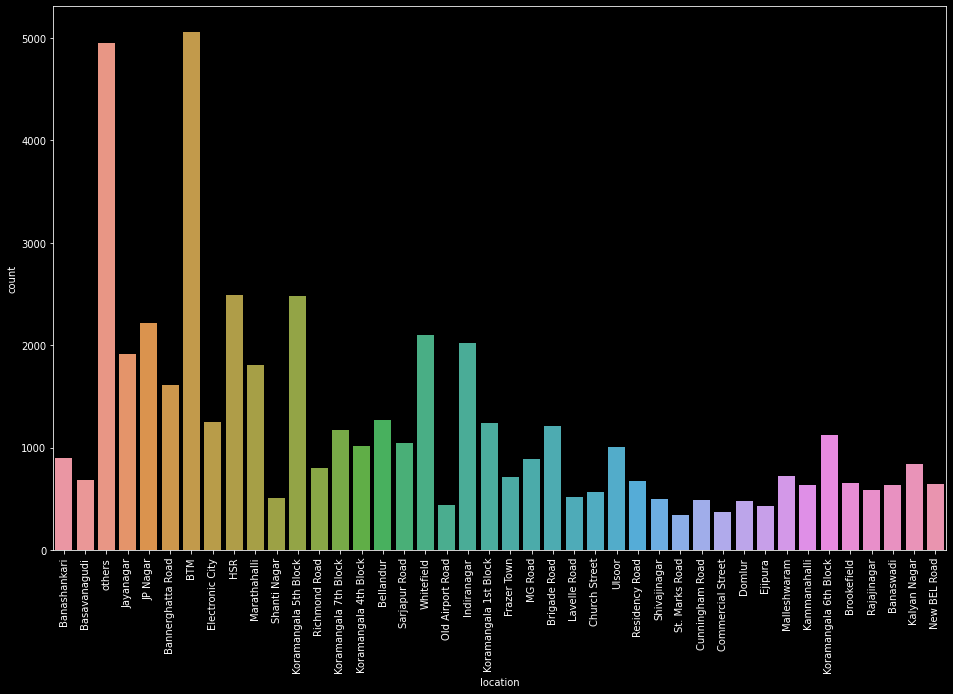

In [121]:
plt.figure(figsize=(16,10))
ax=sns.countplot(df['location'])
plt.xticks(rotation=90)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='online_order', ylabel='count'>

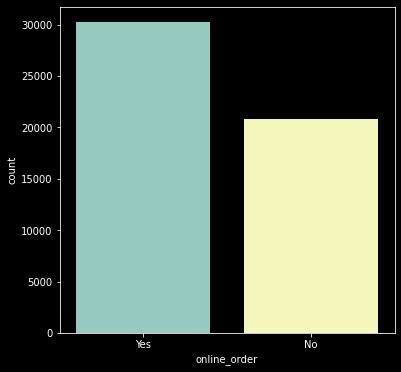

In [122]:
plt.figure(figsize=(6,6))
sns.countplot(df['online_order'])

<AxesSubplot:xlabel='online_order', ylabel='rate'>

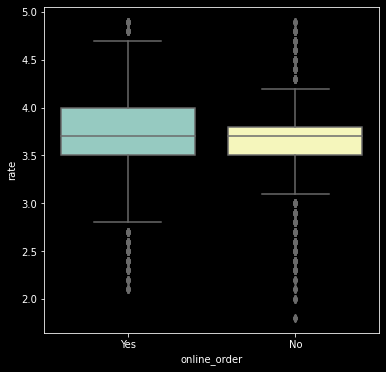

In [123]:
#ONLINE ORDER VS RATE
plt.figure(figsize=(6,6))
sns.boxplot(x='online_order',y='rate',data=df)

<AxesSubplot:xlabel='book_table', ylabel='rate'>

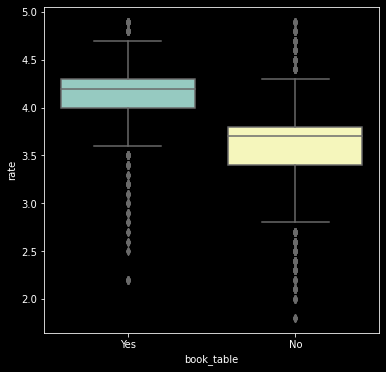

In [124]:
plt.figure(figsize=(6,6))
sns.boxplot(x='book_table',y='rate',data=df)

In [125]:
df.name[:10]

0                                              Jalsa
1                                     Spice Elephant
2                                    San Churro Cafe
3                              Addhuri Udupi Bhojana
4                                      Grand Village
5                                    Timepass Dinner
6    Rosewood International Hotel - Bar & Restaurant
7                                             Onesta
8                                     Penthouse Cafe
9                                          Smacznego
Name: name, dtype: object

In [130]:
df1=df.groupby(['location','online_order'])['name'].count()
df1.to_csv('location_online.csv')


In [132]:
df1=pd.read_csv('location_online.csv')
df1.head()

,location,online_order,name
0,BTM,No,1763
1,BTM,Yes,3293
2,Banashankari,No,397
3,Banashankari,Yes,505
4,Banaswadi,No,302


In [134]:
df2=pd.pivot_table(df1,values=None,index=['location'],columns=['online_order'])

In [135]:
df2.head()

name      
online_order         No   Yes
location                     
BTM                1763  3293
Banashankari        397   505
Banaswadi           302   338
Bannerghatta Road   685   924
Basavanagudi        243   441

<AxesSubplot:xlabel='location'>

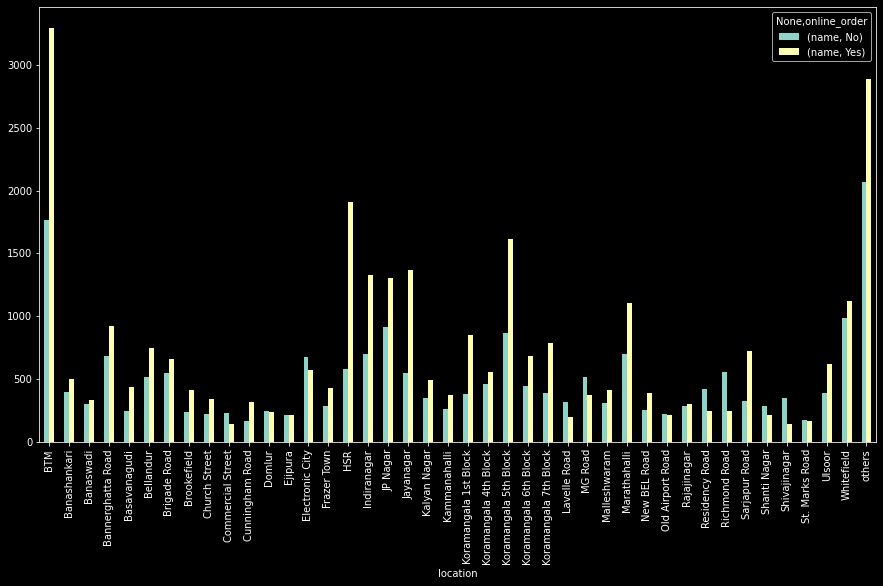

In [136]:
df2.plot(kind='bar',figsize=(15,8))

<AxesSubplot:xlabel='Type', ylabel='rate'>

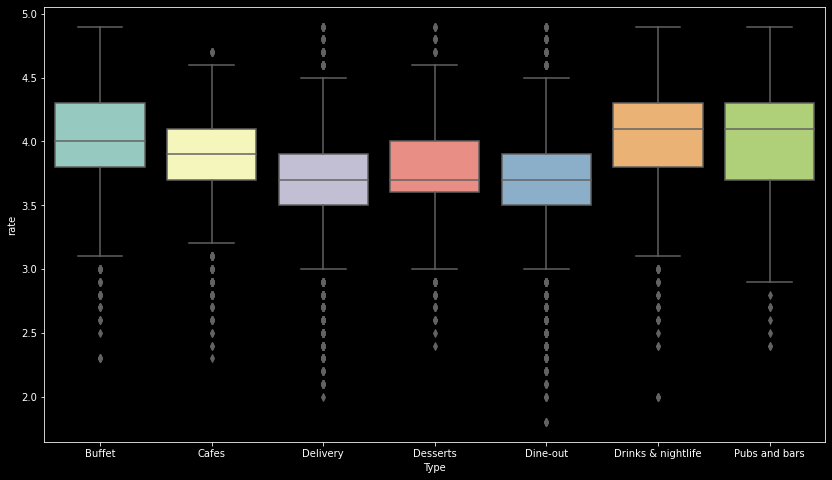

In [137]:
#VISUALIZING TYPES OF RESTURENT
plt.figure(figsize=(14,8))
sns.boxplot(x='Type',y='rate',data=df)

In [138]:
df.Type

0               Buffet
1               Buffet
2               Buffet
3               Buffet
4               Buffet
             ...      
51712    Pubs and bars
51713    Pubs and bars
51714    Pubs and bars
51715    Pubs and bars
51716    Pubs and bars
Name: Type, Length: 51042, dtype: object

In [146]:
#GROUP TYPE OF RESTURENT LOCATION WISE
df3=df.groupby(['location','Type'])['name'].count()
df3.to_csv('lovation_type.csv')


In [147]:
df3=pd.read_csv('lovation_type.csv')
# df3.head()
df3=pd.pivot_table(df3,values=None,index=['location'],columns=['Type'],aggfunc=np.sum)

In [148]:
df3.head()

name                                                      \
Type              Buffet Cafes Delivery Desserts Dine-out Drinks & nightlife   
location                                                                       
BTM                 21.0  83.0   3053.0    198.0   1660.0               22.0   
Banashankari         7.0  36.0    418.0     71.0    356.0               14.0   
Banaswadi            NaN  24.0    310.0     37.0    262.0                6.0   
Bannerghatta Road    9.0  46.0    828.0    137.0    578.0                9.0   
Basavanagudi         7.0  11.0    344.0     66.0    251.0                5.0   

                                 
Type              Pubs and bars  
location                         
BTM                        19.0  
Banashankari                NaN  
Banaswadi                   1.0  
Bannerghatta Road           2.0  
Basavanagudi                NaN

<AxesSubplot:xlabel='location'>

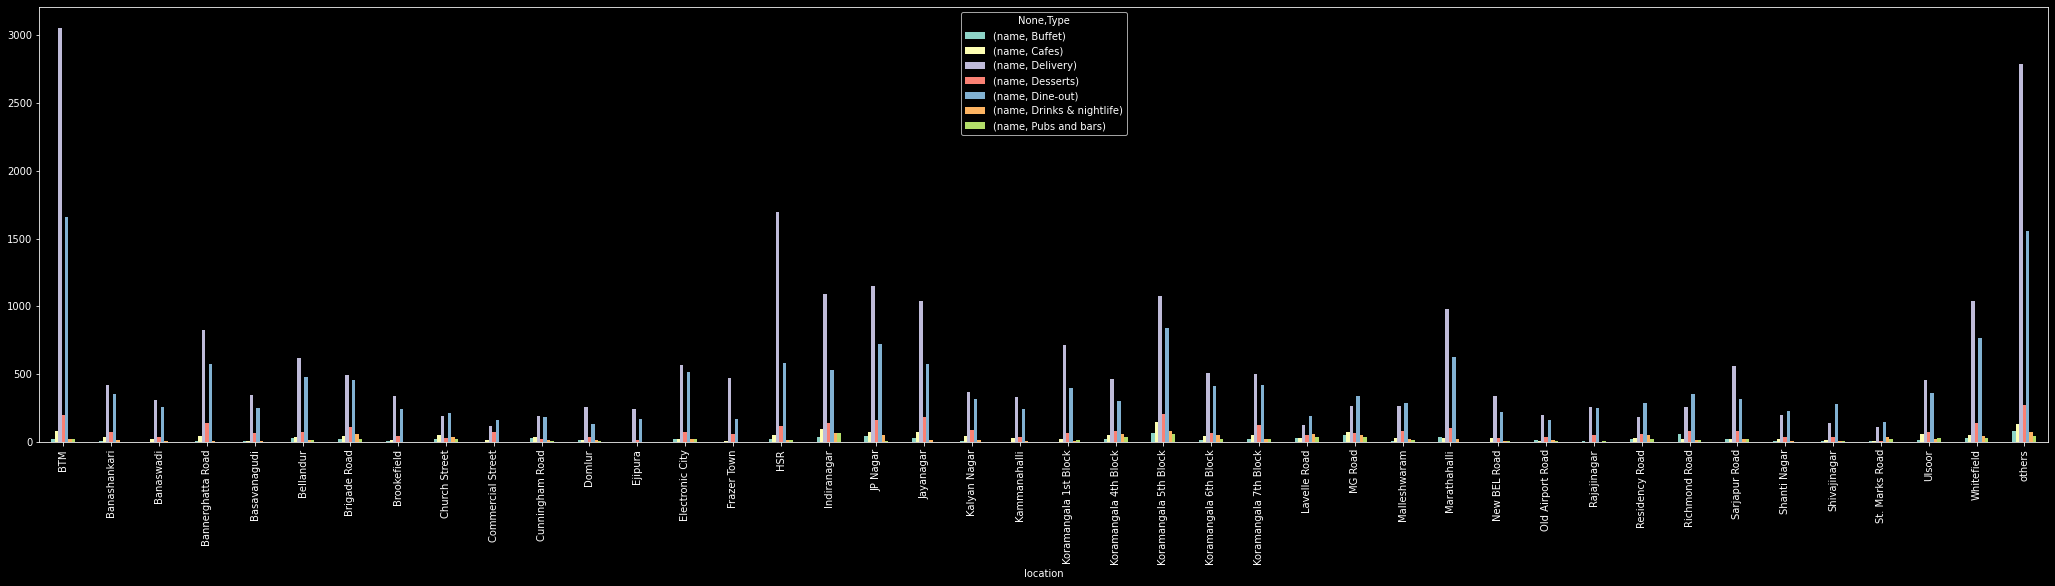

In [149]:
df3.plot(kind='bar',figsize=(36,8))

In [151]:
df4=df[['location','votes']]
df4.isna().sum()

location    0
votes       0
dtype: int64

In [152]:
df4.drop_duplicates(inplace=True)


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [163]:
df5=df4.groupby(['location'])['votes'].sum()

In [164]:
df5=df5.to_frame()


In [165]:
df5=df5.sort_values('votes',ascending=False)
df5.head()

,votes
location,
Koramangala 5th Block,1063061
Indiranagar,648886
Church Street,291543
Koramangala 4th Block,282003
JP Nagar,277901


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41]),
 [Text(0, 0, 'Koramangala 5th Block'),
  Text(1, 0, 'Indiranagar'),
  Text(2, 0, 'Church Street'),
  Text(3, 0, 'Koramangala 4th Block'),
  Text(4, 0, 'JP Nagar'),
  Text(5, 0, 'Jayanagar'),
  Text(6, 0, 'Whitefield'),
  Text(7, 0, 'HSR'),
  Text(8, 0, 'Marathahalli'),
  Text(9, 0, 'Koramangala 7th Block'),
  Text(10, 0, 'Lavelle Road'),
  Text(11, 0, 'Brigade Road'),
  Text(12, 0, 'BTM'),
  Text(13, 0, 'MG Road'),
  Text(14, 0, 'others'),
  Text(15, 0, 'Koramangala 6th Block'),
  Text(16, 0, 'Sarjapur Road'),
  Text(17, 0, 'Residency Road'),
  Text(18, 0, 'St. Marks Road'),
  Text(19, 0, 'Malleshwaram'),
  Text(20, 0, 'Bannerghatta Road'),
  Text(21, 0, 'Koramangala 1st Block'),
  Text(22, 0, 'New BEL Road'),
  Text(23, 0, 'Cunningham Road'),
  Text(24, 0, 'Bellandur'),
  Text(25, 0, 'Kalyan Na

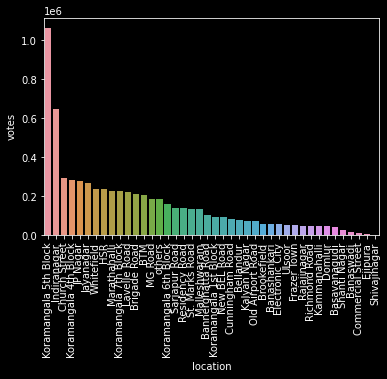

In [166]:
sns.barplot(df5.index,df5['votes'])
plt.xticks(rotation=90)